# NLP Part II

Downloaded the dataset from yelp website. https://www.yelp.com/dataset

In [3]:
import numpy as np
import pandas as pd
import json

In [4]:
yelp = pd.read_json('yelp_dataset/review.json',lines=True)

In [5]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1,Q1sbwvVQXV2734tPgoKj4Q,1,Total bill for this horrible service? Over $8G...,6,hG7b0MtEbXx5QzbzE6C_VA
1,NZnhc2sEQy3RmzKTZnqtwQ,0,2017-01-14 21:30:33,0,GJXCdrto3ASJOqKeVWPi6Q,5,I *adore* Travis at the Hard Rock's new Kelly ...,0,yXQM5uF2jS6es16SJzNHfg
2,WTqjgwHlXbSFevF32_DJVw,0,2016-11-09 20:09:03,0,2TzJjDVDEuAW6MR5Vuc1ug,5,I have to say that this office really has it t...,3,n6-Gk65cPZL6Uz8qRm3NYw
3,ikCg8xy5JIg_NGPx-MSIDA,0,2018-01-09 20:56:38,0,yi0R0Ugj_xUx_Nek0-_Qig,5,Went in for a lunch. Steak sandwich was delici...,0,dacAIZ6fTM6mqwW5uxkskg
4,b1b1eb3uo-w561D0ZfCEiQ,0,2018-01-30 23:07:38,0,11a8sVPMUFtaC7_ABRkmtw,1,Today was my second out of three sessions I ha...,7,ssoyf2_x0EQMed6fgHeMyQ


In [6]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6685900 entries, 0 to 6685899
Data columns (total 9 columns):
business_id    object
cool           int64
date           datetime64[ns]
funny          int64
review_id      object
stars          int64
text           object
useful         int64
user_id        object
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 459.1+ MB


In [7]:
yelp.describe()

,cool,funny,stars,useful
count,6.685900e+06,6.685900e+06,6.685900e+06,6.685900e+06
mean,5.787708e-01,4.827667e-01,3.716199e+00,1.354134e+00
std,2.359024e+00,2.378646e+00,1.463643e+00,3.700192e+00
min,-1.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00
25%,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00
75%,1.000000e+00,0.000000e+00,5.000000e+00,2.000000e+00
max,5.060000e+02,1.290000e+03,5.000000e+00,1.241000e+03


In [8]:
yelp['text length'] = yelp['text'].apply(len)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

**Used FacetGrid to create a grid of 5 histograms of text length based off of the star ratings.** 

<Figure size 720x432 with 0 Axes>

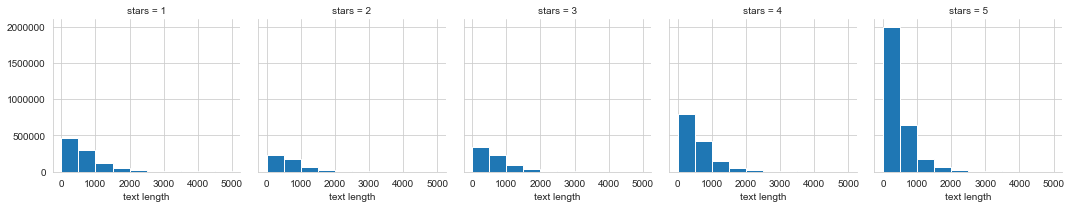

In [13]:
plt.figure(figsize=(10,6))
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text length')

**Created a boxplot of text length for each star category.**

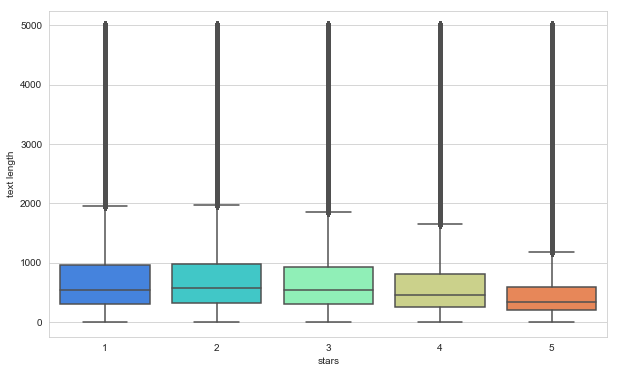

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(x='stars',y='text length',data=yelp,palette='rainbow')

**Created a countplot of the number of occurrences for each type of star rating.**

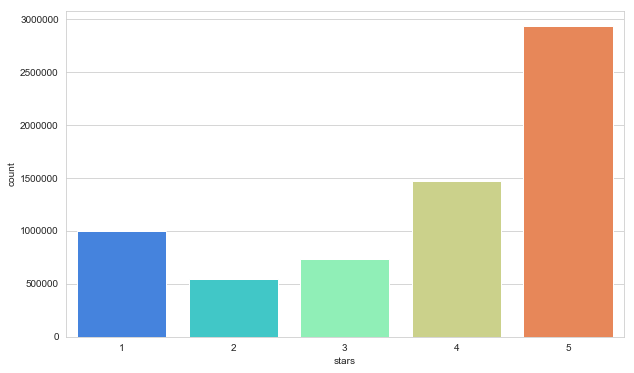

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x='stars',data=yelp,palette='rainbow')

**Used groupby to get the mean values of the numerical columns.**

In [18]:
stars = yelp.groupby('stars').mean()
stars

,cool,funny,useful,text length
stars,,,,
1,0.243788,0.616449,2.054681,760.444319
2,0.399765,0.623617,1.582709,762.703278
3,0.672871,0.609040,1.377155,710.315383
4,0.860899,0.570298,1.382258,624.224334
5,0.561312,0.335379,1.052618,481.532439


**corr( ) method on that groupby dataframe to produce this dataframe:**

In [19]:
stars.corr()

,cool,funny,useful,text length
cool,1.000000,-0.173444,-0.679328,-0.469384
funny,-0.173444,1.000000,0.717921,0.946166
useful,-0.679328,0.717921,1.000000,0.817055
text length,-0.469384,0.946166,0.817055,1.000000


**A heatmap based off that .corr( ) dataframe:**

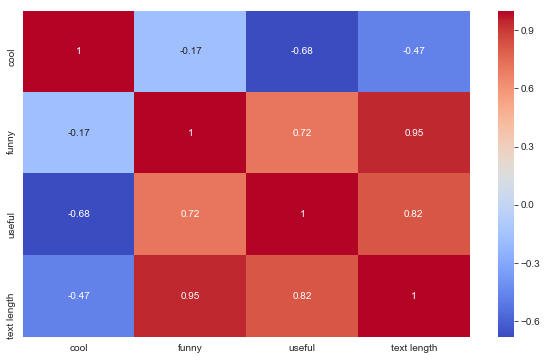

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(stars.corr(),cmap='coolwarm',annot=True)

## NLP Classification

**A dataframe called that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.**

In [21]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

In [22]:
X = yelp_class['text']
y = yelp_class['stars']

**Import CountVectorizer and created a CountVectorizer object.**

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [24]:
X = cv.fit_transform(X)

## Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

## Training the Model

First, used the Naive Bayes model

In [27]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [28]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Predictions and Evaluations

In [29]:
predictions = nb.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix,classification_report

In [31]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[271200  29540]
 [ 52045 827788]]


              precision    recall  f1-score   support

           1       0.84      0.90      0.87    300740
           5       0.97      0.94      0.95    879833

   micro avg       0.93      0.93      0.93   1180573
   macro avg       0.90      0.92      0.91   1180573
weighted avg       0.93      0.93      0.93   1180573



**The result is good overall with 93% precision rate.**

## Using Text Processing 

used TfidfTransformer model

In [32]:
from sklearn.feature_extraction.text import  TfidfTransformer

In [33]:
from sklearn.pipeline import Pipeline

**A pipeline with the following steps:CountVectorizer( ), TfidfTransformer( ),MultinomialNB( )**
 - we need to re-split the original data

In [34]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

### Train Test Split

In [35]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

**We can't use the same training data as last time because that data has already been vectorized.**

In [36]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [37]:
predictions = pipeline.predict(X_test)

In [38]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[243221  57519]
 [ 15222 864611]]
              precision    recall  f1-score   support

           1       0.94      0.81      0.87    300740
           5       0.94      0.98      0.96    879833

   micro avg       0.94      0.94      0.94   1180573
   macro avg       0.94      0.90      0.91   1180573
weighted avg       0.94      0.94      0.94   1180573



**There is a marginal improvement in the overall Precision rate.**